# Projeto 3 

### Jose Fernando de Melo Cruz

## A ambientação em que a mulher vive intefere no numero de filhos que ela terá ?

In [67]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
import numpy as np

import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm  #Usa OLS como no R

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Jose Fernando\Documents\GitHub\CD\projeto 3\CD\Projeto 3


In [68]:
idh = pd.read_excel('idh.xlsx', index_col=0)

In [69]:
fpm = pd.read_excel('fpm.xlsX', index_col=0)


In [70]:
ppc = pd.read_excel('ppc.xlsx',index_col=0)

In [71]:
#Juntando as três tabelas no para uma planilha unificada

dados = fpm.join(idh, how='outer')
dados = dados.join(ppc, how='outer')
dados.head()

,fertilidade,IDH,PIB
Abkhazia,NaN,NaN,NaN
Afghanistan,5.40,0.398,1695.0
Akrotiri and Dhekelia,NaN,NaN,NaN
Albania,1.75,0.739,9640.0
Algeria,2.83,0.698,12606.0


In [72]:
dados.shape

(273, 3)

In [73]:
#Retirar NaN dos nossos dados, no caso, retirando todos os países que não tem algum dos 3 dados no ano de 2011
dados=dados[~np.isnan(dados.IDH)]
dados=dados[~np.isnan(dados.fertilidade)]
dados=dados[~np.isnan(dados.PIB)]
dados.head()

,fertilidade,IDH,PIB
Afghanistan,5.40,0.398,1695.0
Albania,1.75,0.739,9640.0
Algeria,2.83,0.698,12606.0
Angola,6.10,0.486,7094.0
Antigua and Barbuda,2.12,0.764,19988.0


In [74]:
dados.shape

(182, 3)

### Análise Descritiva

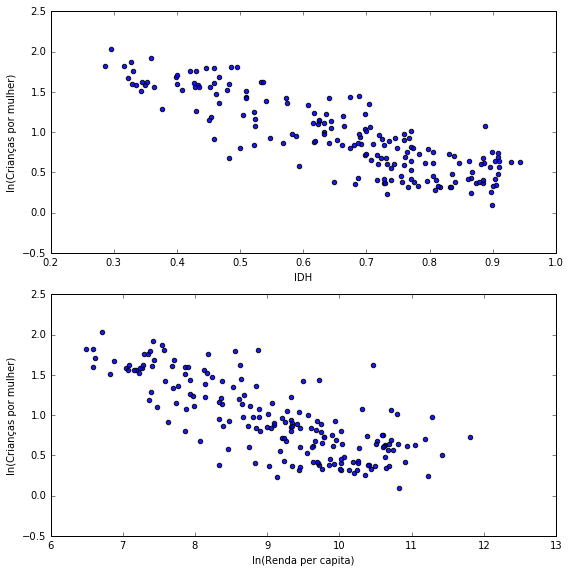

In [75]:
f, ax = plt.subplots(2,figsize=(8,8))
ax[0].scatter(dados.IDH, np.log(dados.fertilidade), alpha=0.9)  # Plot the raw data
ax[0].set_xlabel("IDH")
ax[0].set_ylabel("ln(Crianças por mulher)")

ax[1].scatter(np.log(dados.PIB), np.log(dados.fertilidade), alpha=0.9)  # Plot the raw data
ax[1].set_xlabel("ln(Renda per capita)")
ax[1].set_ylabel("ln(Crianças por mulher)")


plt.tight_layout(1)

In [76]:
dados.corr(method='pearson')

,fertilidade,IDH,PIB
fertilidade,1.000000,-0.850709,-0.493709
IDH,-0.850709,1.000000,0.693283
PIB,-0.493709,0.693283,1.000000


In [77]:
#dados.PIB = np.log(dados.PIB)

<IPython.core.display.Javascript object>


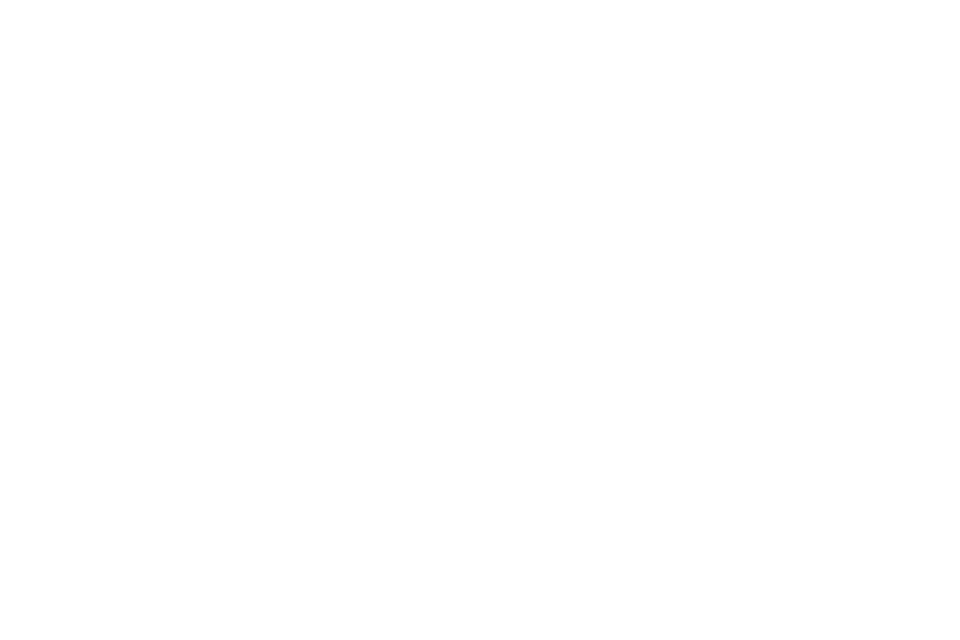

In [78]:
#Linear Regression - PRIMEIRA MANEIRA DE FAZER REGRESSÃO USANDO PACOTE ols
#Escreve modelo como no R

%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

X = dados[['IDH', 'PIB']]
y = np.log(dados['fertilidade'])

X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(X.IDH.min(), X.IDH.max(), 100), 
                       np.linspace(X.PIB.min(), X.PIB.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y - est.predict(X)
ax.scatter(X[resid >= 0].IDH, X[resid >= 0].PIB, y[resid >= 0], c='blue', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].IDH, X[resid < 0].PIB, y[resid < 0], c='yellow', alpha=1.0)

ax.set_xlabel('IDH')
ax.set_ylabel('renda per capta')
ax.set_zlabel('fertilidade')
ax.set_title('Modelo')
plt.show()

In [79]:
#Linear Regression - SEGUNDA MANEIRA DE FAZER REGRESSÃO USANDO PACOTE ols
#Informando X como matriz de planejamento

#Montagem dos dados
y=dados.fertilidade
X=dados.iloc[:,(1,2)]
X=sm1.add_constant(X)  # Adds a constant term to the predictor
X.head()

model=sm1.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fertilidade   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     256.7
Date:                Wed, 07 Dec 2016   Prob (F-statistic):           2.62e-53
Time:                        01:33:07   Log-Likelihood:                -203.36
No. Observations:                 182   AIC:                             412.7
Df Residuals:                     179   BIC:                             422.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          8.1274      0.258     31.489      0.000         7.618     8.637
IDH           -8.2767      0.446    -18.564      0.000        -9.157    -7.397
PIB         1.408e-05   4.02e-06      3.508      0.001      6.16e-06   2.2e-05
==============================================================================
Omnibus:                        3.371   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.185   Jarque-Bera (JB):                3.288
Skew:                           0.170   Prob(JB):                        0.193
Kurtosis:                       3.564   Cond. No.                     2.35e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
model = sm.ols(formula='fertilidade ~ IDH + np.log(PIB)', data = dados) # Describe Model
results = model.fit() # Fit model
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:            fertilidade   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     237.7
Date:                Wed, 07 Dec 2016   Prob (F-statistic):           4.10e-51
Time:                        01:33:07   Log-Likelihood:                -208.50
No. Observations:                 182   AIC:                             423.0
Df Residuals:                     179   BIC:                             432.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       6.8619      0.627     10.943      

### avaliar variaveis

avaliando as variaveis do modelo, pelo teste de hipoteses:
                                
                            IDH                  RENDA PER CAPTA
                            H0:B1 igual 0        H0:B2 igual 0
                            H1:B1 dferente 0     H1:B2 diferene 0
                       
para os os dois casos regentaremos a hipotese nula, ja que o nivel de significancia foi menor de 5%. já que elas tem influencia para o meu modelo. 

### qualidade de ajuste

para avaliar a quaidade de ajuste utilizamos o R-squared que fica entre 0 e 1, quanto mais perto de 1 melhor é o ajuste. No caso, ela é de 0.726, ou seja muito boa para utilizarmos.

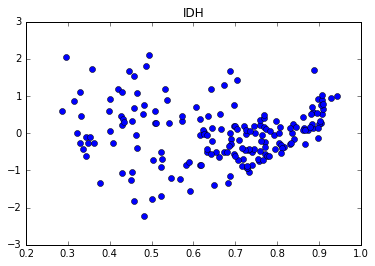

In [85]:
%matplotlib inline
plt.plot(dados.IDH, results.resid,"o")
plt.title("IDH")
plt.show()

podemos analizar nessas disposição de residuos que ela se igual a "ideal" para o IDH.

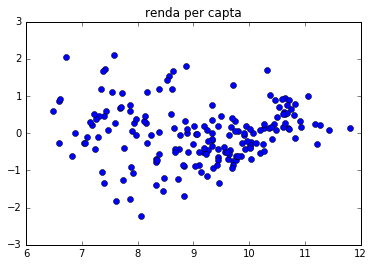

In [84]:
%matplotlib inline
plt.plot(np.log(dados.PIB), results.resid,"o")
plt.title("renda per capta")
plt.show()

podemos analizar que a disposição dos residuos se iguala a 'ideal' para o parametro renda per capta

### interpretação de paramentros

os parametros fertilidade por IDH será de 8,2% do modo log- lin

ja nos parametros de fertilidade po renda per capta sera de  0,16% do modo log -log.

### resumo do objetivo

OS objetivos desses parametros são ser justificativas para a fertilidade(crildren per women). Como indicado nos graficos e tabelas de crianças por mulheres pelas outras variaveis, é possive percebermos que quanto maior a a razao de craincas po mulheres menor são o indice de desenvolvimento humano e a renda per capta. Percebemos bem isso se comparamos com as diferencas economias e sociais do Brasil por exemplo, nas regioes norte e nordeste que o indice de desenvilvimento humano é bsixo em muitos luagares e onde tem os menores salarios cada pessoa.

In [94]:
baixo = 0.499
medio = 0.800

In [88]:
subgrupo = pd.DataFrame()
subgrupo['IDH'] = dados[dados.IDH <= baixo].IDH
subgrupo['PIB']=dados[dados.IDH <= baixo].PIB
subgrupo['fertilidade']=dados[dados.IDH <= baixo].fertilidade
subgrupo.describe()

,IDH,PIB,fertilidade
count,41.000000,41.000000,41.000000
mean,0.405829,2021.439024,5.004146
std,0.060308,1275.288008,1.123724
min,0.286000,657.000000,1.980000
25%,0.349000,1273.000000,4.590000
50%,0.427000,1626.000000,4.950000
75%,0.458000,2341.000000,5.780000
max,0.495000,7094.000000,7.580000


<IPython.core.display.Javascript object>


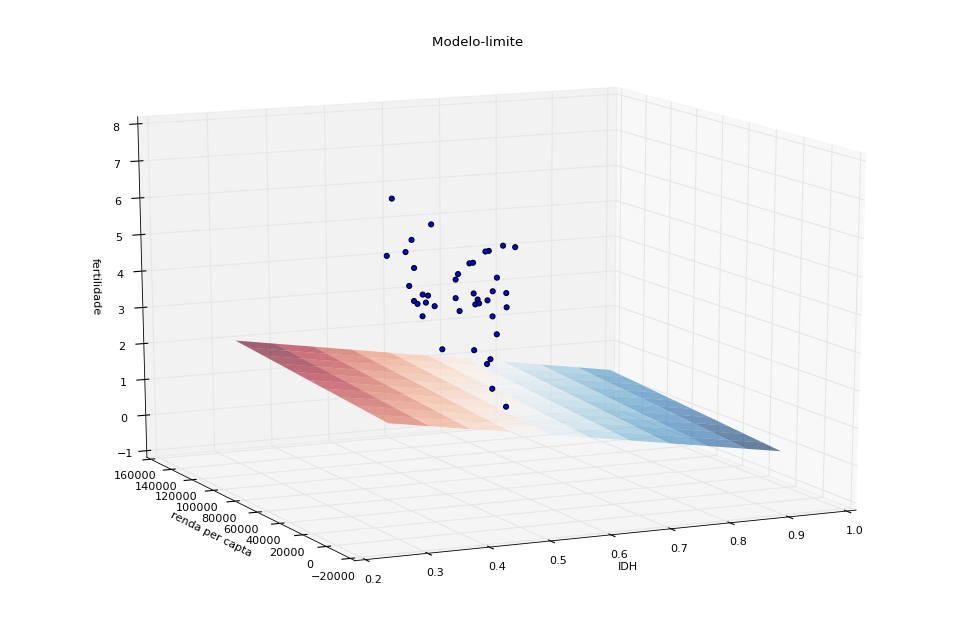

In [91]:

%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

X = dados[['IDH', 'PIB']]
y = np.log(dados['fertilidade'])

X = sm1.add_constant(X)

X2 = subgrupo[['IDH', 'PIB']]
y2 = subgrupo['fertilidade']

X2 = sm1.add_constant(X2)

est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(X.IDH.min(), X.IDH.max(), 100), 
                       np.linspace(X.PIB.min(), X.PIB.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y2 - est.predict(X2)
ax.scatter(X2[resid >= 0].IDH, X2[resid >= 0].PIB, y2[resid >= 0], c='blue', alpha=1.0, facecolor='white')
ax.scatter(X2[resid < 0].IDH, X2[resid < 0].PIB, y2[resid < 0], c='yellow', alpha=1.0)

ax.set_xlabel('IDH')
ax.set_ylabel('renda per capta')
ax.set_zlabel('fertilidade')
ax.set_title('Modelo-limite ')
plt.show()

o sub grupo mostra apenas aqueles que o pais tem o IDH abixou de 0.499 ou seja considerado baixo.

In [95]:
subgrupo2 = pd.DataFrame()
subgrupo2['IDH'] = dados[dados.IDH >= medio].IDH
subgrupo2['PIB']=dados[dados.IDH >= medio].PIB
subgrupo2['fertilidade']=dados[dados.IDH >= medio].fertilidade
subgrupo2.describe()

,IDH,PIB,fertilidade
count,42.000000,42.000000,42.000000
mean,0.869524,41716.523810,1.684762
std,0.038032,21096.694671,0.333936
min,0.805000,19405.000000,1.100000
25%,0.835750,28519.750000,1.442500
50%,0.880000,38473.500000,1.615000
75%,0.900250,44692.000000,1.895000
max,0.943000,133734.000000,2.920000


<IPython.core.display.Javascript object>


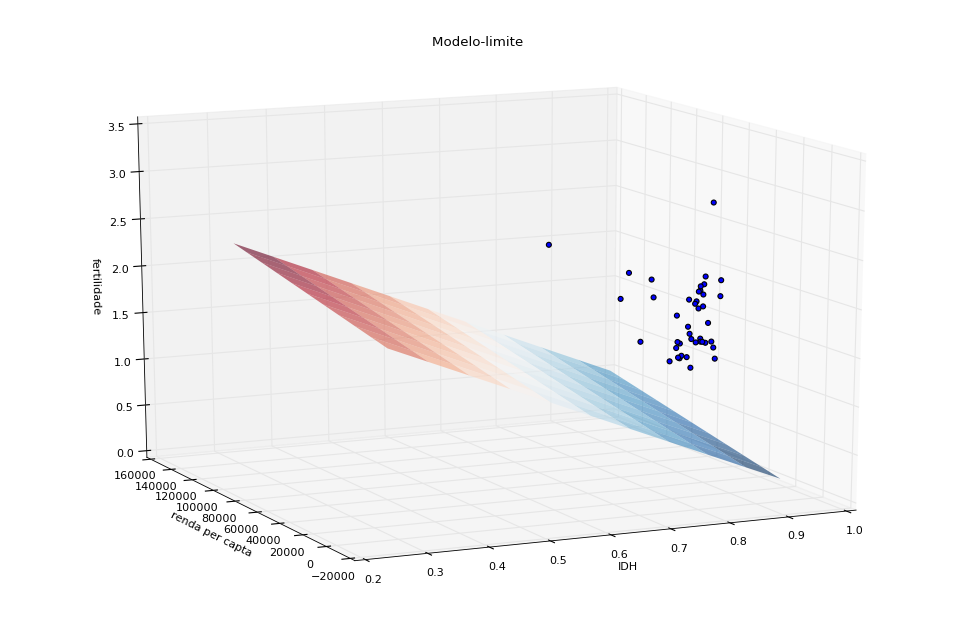

In [97]:

%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

X = dados[['IDH', 'PIB']]
y = np.log(dados['fertilidade'])

X = sm1.add_constant(X)

X2 = subgrupo2[['IDH', 'PIB']]
y2 = subgrupo2['fertilidade']

X2 = sm1.add_constant(X2)

est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(X.IDH.min(), X.IDH.max(), 100), 
                       np.linspace(X.PIB.min(), X.PIB.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y2 - est.predict(X2)
ax.scatter(X2[resid >= 0].IDH, X2[resid >= 0].PIB, y2[resid >= 0], c='blue', alpha=1.0, facecolor='white')
ax.scatter(X2[resid < 0].IDH, X2[resid < 0].PIB, y2[resid < 0], c='yellow', alpha=1.0)

ax.set_xlabel('IDH')
ax.set_ylabel('renda per capta')
ax.set_zlabel('fertilidade')
ax.set_title('Modelo-limite ')
plt.show()

## conclusão

Nesse projeto utilizamos de varias ferramentas e elas me ajudarm a chegar nas minhas conclusoes. Como observado no R-squared o IDH e renda per capta tem uma relação muito forte. conclui que quanto menor a renda per capta e menor o IDH maoir será o numero de filhos por mulher. Países com IDH alto e alta renda per capta tendem a se estabilizar e ter poucos filhos, alem de terem escolaridade de maior nivel, coisa que alguem com filhos jovem teria extrema dificuldade pela dupla jornada de mae e estudante.